In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

# Problem

Suppose $\theta$ is the fraction of infected individual in a small city. A small sample of $n = 20$ individual from the city are checked and the total number of people infected is k = 4.

The MLE estimate of $\theta$ is 4/20 sicne we have only one city to estimate from.

**What is the fraction of infected individuals?**


Using binomial model, assume that each individual probability of being infected is $\theta$ so the total number of infected people given a sample of 20 is:

$$\cal{L} = p(n,k \mid \theta) = Binom(n,k,\theta) = \frac{n!}{k!(n-k)!}\theta^k(1-\theta)^{(n-k)}$$

Now the studies from other cities shows that $\theta$ varies from 0.05 to 0.20 with an average value of 0.10. How do you incorporate this new information as a prior distribution of $\theta$.


# Prior $p(\theta)$ construction

We can choose any prior that encapsulates this information. It is easier to choose a conjugate prior to our binomial likelihood $\cal{L}$, which is a Beta distribution.

In [2]:
from scipy.stats import beta

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:2562: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


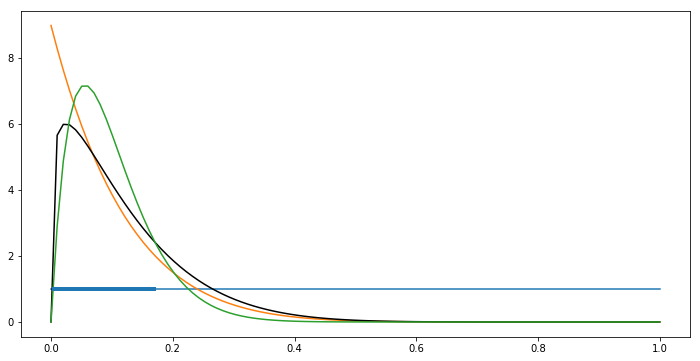

In [19]:
x = np.linspace(0., 1., 100)
plt.plot(x, beta.pdf(x, 1, 1))
plt.plot(x, beta.pdf(x, 1, 9))
plt.plot(x, beta.pdf(x,1.2, 9), color='k')
plt.plot(x, beta.pdf(x, 2,18))
plt.axhline(1, 0.05, 0.2, 'r', lw=4)

We choose $\alpha = 1.2$ and $\beta 0.9$ such as the mean of the prior is 0.1 and the range to be consistent with other cities.

# Posterior $p(\theta | D)$ analysis

Given prior and likelihood like above, we have the posterior distribution as $$\theta | D \sim Beta(\alpha + k, \beta + n - k)$$

Sometimes we may want to summarize other aspects of a posterior distribution. 

For example we may want to compare two or more populations. In that case we may be interested in the posterior distribution of $\theta_1 - \theta_2$, or $\frac{\theta_1}{\theta_2}$
. If we can generate random samples from these distributions, then all of these posterior quantities can be approximated to an arbitrary degree of precision using MC and MCMC methods.

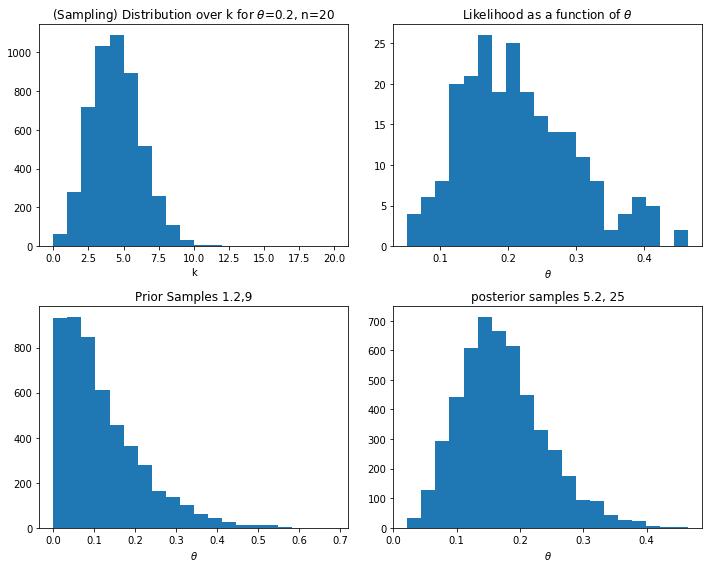

In [26]:
plt.figure(figsize=[10,8])
## INITIALIZING
n = 20 # number of data
N =5000 # samples
k=4  # binomial k

## THE LIKELIHOOD:BINOMIAL 
theta=k/n

liks  = np.random.binomial( n, theta, N);

plt.subplot(2,2,1)
plt.hist(liks, bins=np.arange(21))
plt.title("(Sampling) Distribution over k for $\\theta$={}, n={}".format(theta, n))
plt.xlabel('k')

# I need samples of theta (not of k)
lik_theta = lambda theta: theta**k * (1-theta)**(n-k)
#use rejection to get this distribution 
X=np.random.uniform(low=0, high=1, size=N)
Y=np.random.uniform(low=0, high=0.000213, size=N)
Yt = lik_theta(X) 
Xa = X[Y<Yt]
plt.subplot(2,2,2)
plt.hist(Xa, 20)
plt.xlabel('$\\theta$')
plt.title('Likelihood as a function of $\\theta$')

## PRIOR
alpha=1.2
beta=9
prs = np.random.beta(alpha, beta, N);

plt.subplot(2,2,3)
plt.hist(prs, 20)
plt.title('Prior Samples {},{}'.format(alpha, beta))
plt.xlabel('$\\theta$')

## POSTERIOR EXACT

posts = np.random.beta(alpha+k, beta+n-k, N);
plt.subplot(2,2,4) 
plt.hist(posts, 20)
plt.title('posterior samples {}, {}'.format(alpha+k, beta+n-k))
plt.xlabel('$\\theta$');
plt.tight_layout()

# Posterior predictive

$$p(k|D) = \int binomial(n,k,\theta)p(\theta|D)d\theta$$

We generate a emprical distribution of posterior predictive distribution. First we draw $\theta$ from its posterior. And then use it to sample from the likelihood term $binomial(n,k,\theta)$

In [37]:
postpred = np.random.binomial(n, posts)

MAP estimation of k is 3


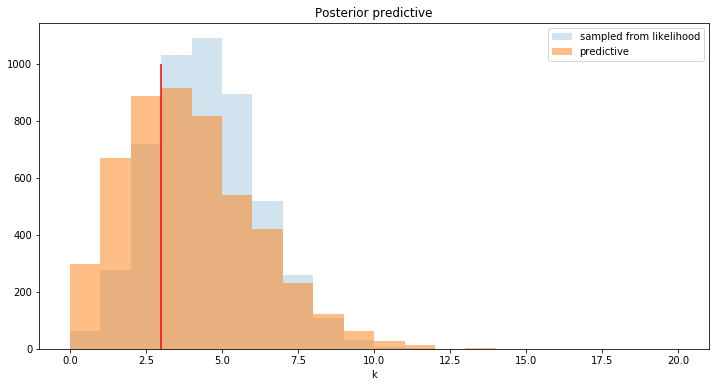

In [53]:
plt.hist(liks, bins=np.arange(21), alpha=0.2, label="sampled from likelihood")
counts, ks, _ = plt.hist(postpred, bins=np.arange(21), alpha=0.5, label="predictive")
mode = ks[np.argmax(counts)]
plt.vlines(mode, 0, 1000, 'r')
plt.title('Posterior predictive')
plt.xlabel('k')
plt.legend()
print('MAP estimation of k is {}'.format(mode))